# **Waste Management using CNN Model**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:03<00:00, 122MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [2]:
# Implimenting Various Libraries
import numpy as np
import pandas as pd
import cv2
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from glob import glob
import matplotlib.pyplot as plt

In [3]:
test_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"
train_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"

In [4]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
import glob

In [5]:
#Visualization
x_data = []
y_data = []
for category in glob.glob(train_path+'/*'):
    for file in tqdm(glob.glob (category+'/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])

data=pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 9999/9999 [00:05<00:00, 1842.31it/s]


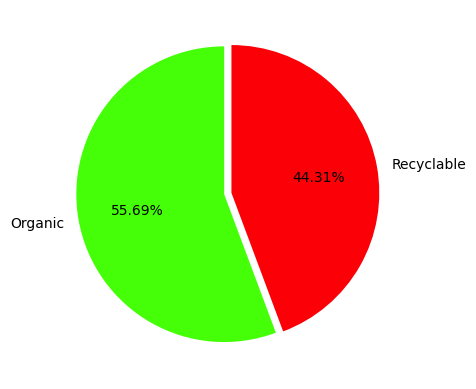

In [6]:
data.shape
colors =['#44FF07','#FB0007']
plt.pie(data.label.value_counts(),labels=['Organic', 'Recyclable'] , startangle=90 , colors=colors,explode=[0,0.05], autopct='%0.2f%%')
plt.show()

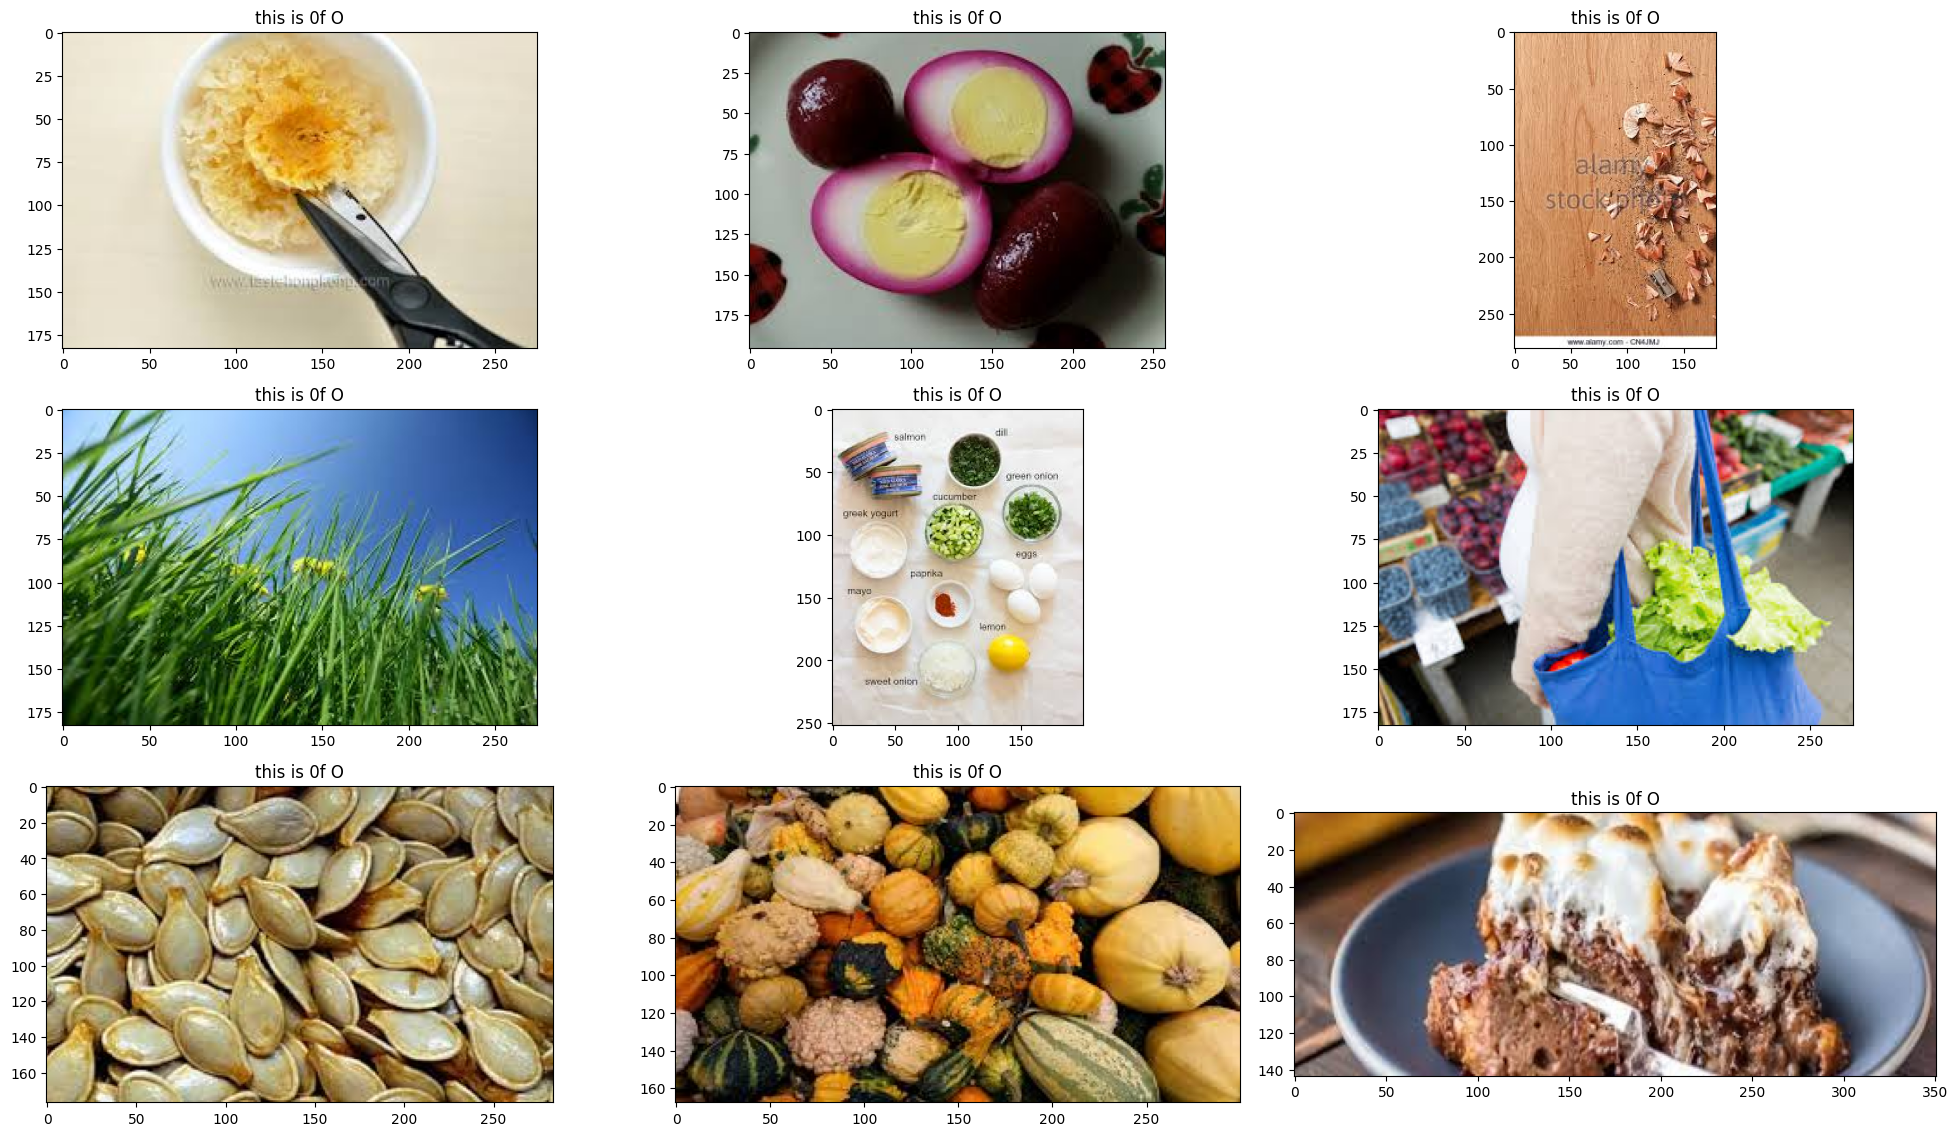

In [7]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index= np.random.randint(15000)
    plt.title('this is 0f {0}'.format(data['label'][index]))
    plt.imshow(data.image[index])
    plt.tight_layout()


In [8]:

model= Sequential()
model.add(Conv2D(32,(3,3), input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())


model.add(Flatten())


model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
batch_size =64



In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
train_datagen= ImageDataGenerator(rescale=1./255)

In [11]:
test_datagen= ImageDataGenerator(rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical")


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [13]:
hist=model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
    )

Epoch 1/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 81s 195ms/step - accuracy: 0.7612 - loss: 0.5280 - val_accuracy: 0.8723 - val_loss: 0.3620
Epoch 2/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 58s 163ms/step - accuracy: 0.8226 - loss: 0.4124 - val_accuracy: 0.8627 - val_loss: 0.3252
Epoch 3/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 60s 169ms/step - accuracy: 0.8503 - loss: 0.3691 - val_accuracy: 0.8898 - val_loss: 0.2746
Epoch 4/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 58s 165ms/step - accuracy: 0.8689 - loss: 0.3335 - val_accuracy: 0.8930 - val_loss: 0.2833
Epoch 5/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 64s 180ms/step - accuracy: 0.8831 - loss: 0.2991 - val_accuracy: 0.8926 - val_loss: 0.2871
Epoch 6/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 59s 167ms/step - accuracy: 0.9016 - loss: 0.2537 - val_accuracy: 0.9085 - val_loss: 0.2740
Epoch 7/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 59s 167ms/step - accuracy: 0.9185 - loss: 0.2170 - val_accuracy: 0.8953 - val_loss: 0.3163
Epoch 8/10
353/353 ━━━━━━━━━━━━━━━━━━━━ 59s 166ms/step - accuracy: 0.9361 - loss: 0

# *Accuracy, Losses & Testing*

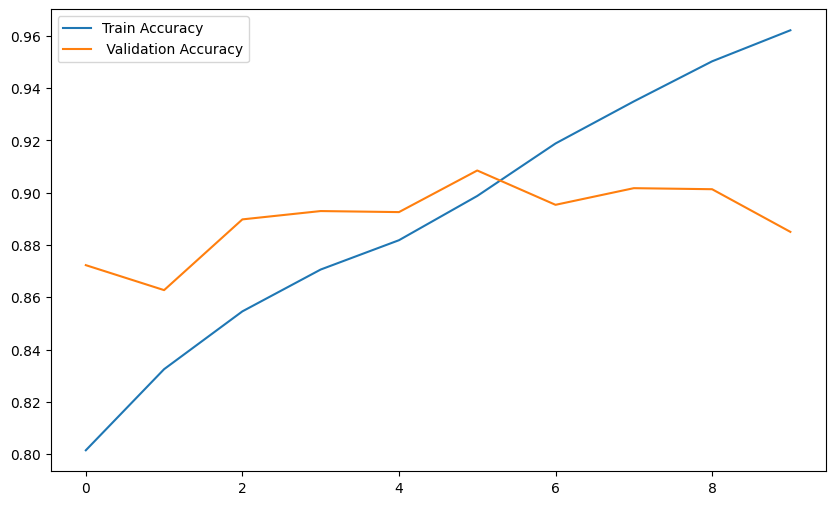

In [14]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label=' Validation Accuracy')
plt.legend()
plt.show()

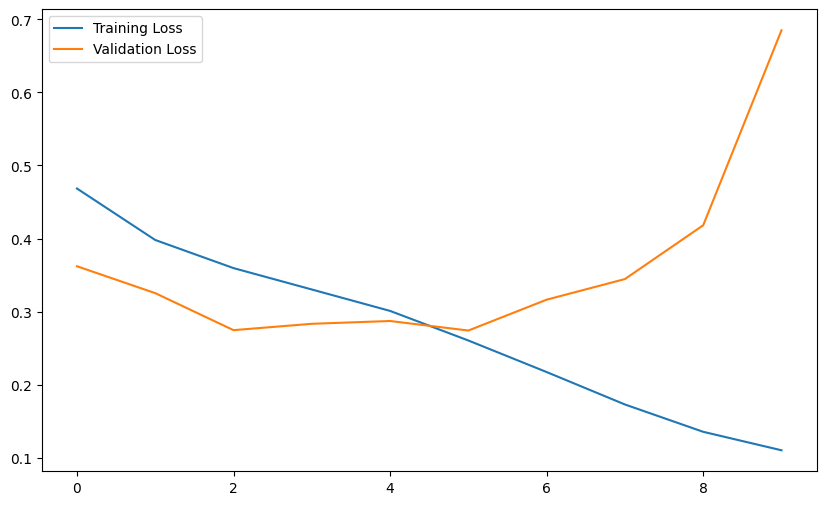

In [15]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [16]:
def predict_fun(img):
  plt.figure(figsize=(6, 4))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img = cv2.resize(img, (224, 224))
  img = np.reshape(img, [-1, 224, 224, 3])
  result = np.argmax(model.predict(img))
  if result == 0:
    print('The image shown is Recyclable Waste')
  elif result == 1:
    print('The image shown is Organic Waste')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 933ms/step
The image shown is Organic Waste


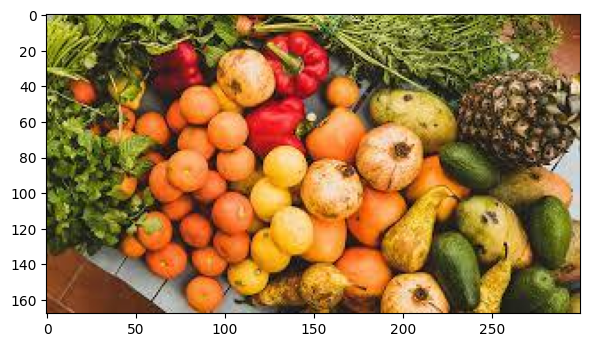

In [17]:
test_img = cv2.imread('/content/fruits.jpg')
predict_fun(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
The image shown is Organic Waste


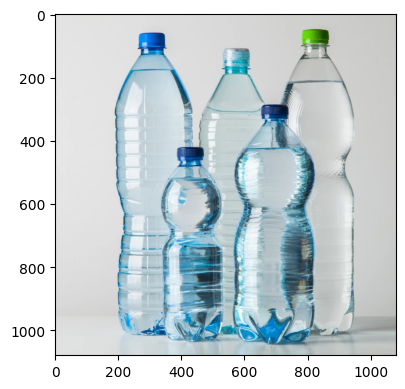

In [18]:
test_img = cv2.imread('/content/plastic-bottles.jpg')
predict_fun(test_img)